<a href="https://colab.research.google.com/github/kamilakhtar015/Machine-Learning---Concepts-GSU-/blob/main/PCA_Implementation_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print('Principal Component Analysis')

Principal Component Analysis


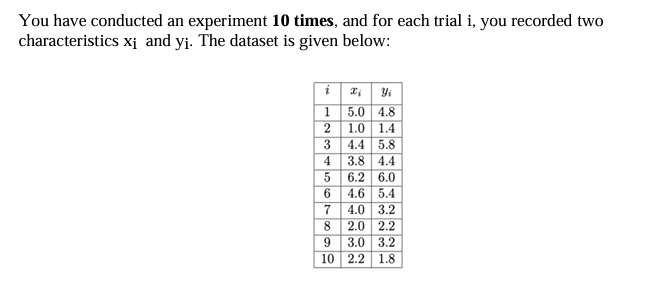


Using Python, Perform a Principal Components Analysis on the set of data. You are supposed to
perform the following steps:

1. Given a dataset with 10 observations, each having two characteristics xi  and yi , visualize
the dataset using a scatter plot.

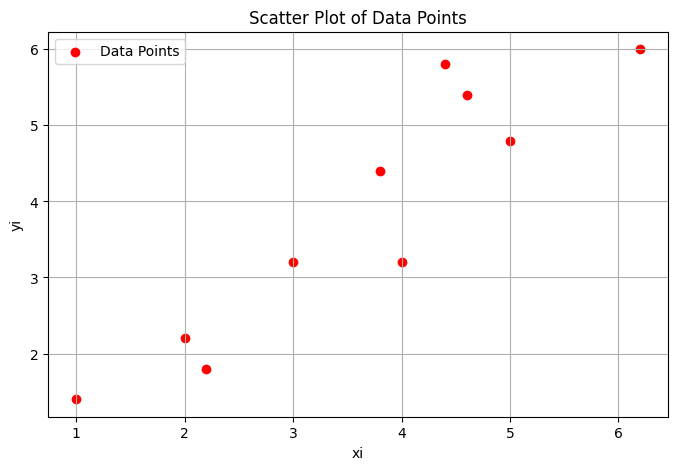

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_ = {
    'xi' : [5.0, 1.0, 4.4, 3.8, 6.2, 4.6, 4.0, 2.0, 3.0, 2.2],
    'yi' : [4.8, 1.4, 5.8, 4.4, 6.0, 5.4, 3.2, 2.2, 3.2, 1.8]
}

data = pd.DataFrame(data_)

plt.figure(figsize=(8,5))
plt.scatter(data['xi'], data['yi'], color='red', label='Data Points')
plt.xlabel('xi')
plt.ylabel('yi')
plt.title('Scatter Plot of Data Points')
plt.legend()
plt.grid(True)
plt.show()